# Exploratory Data Analysis Tutorial for OMOP Dataset Extract

**Exploratory Data Analysis** (EDA) is the process of analyzing and summarizing the main characteristics of a dataset, often using visual methods. It’s an essential step in data analysis that helps to understand the data's structure, detect patterns, identify anomalies, test hypotheses, and determine relationships among variables.

### Setting up the enviroment

In [ ]:
# Importing all the libraries
import pandas as pd  #Data Manipulation
import numpy as np   # Numerical Analysis
import matplotlib.pyplot as plt  # Data Visualization
import seaborn as sns  # Data Visualization

### Loading the dataset
The dataset that we will be using in this tutorial is the list of all patients suffering from COVID-19 in the OMOP database and their demographic data.



In [ ]:
# Replace '/content/COVID-19-BMI.csv' with the actual path to your dataset
df = pd.read_csv('/content/COVID-19-BMI.csv')

# Display the first few rows of the dataset to get a glimpse of its content
df.head()

,person_id,gender,race,condition_concept_id,condition_start_date,age,weight,height,bmi
0,1,F,white,37311061,2020-03-11,62,71.3,160.8,27.6
1,2,F,white,37311061,2020-03-02,75,87.7,169.5,30.5
2,3,M,white,37311061,2020-03-14,52,91.9,177.2,29.4
3,5,F,white,37311061,2020-03-10,32,74.4,158.1,29.8
4,6,F,white,37311061,2020-02-12,44,71.0,NaN,NaN


In [ ]:
# Find the number of rows and columns of your dataset
df.shape

(88166, 9)

In [ ]:
# Provides a concise summary of the DataFrame, including data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88166 entries, 0 to 88165
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   person_id             88166 non-null  int64  
 1   gender                88166 non-null  object 
 2   race                  88166 non-null  object 
 3   condition_concept_id  88166 non-null  int64  
 4   condition_start_date  88166 non-null  object 
 5   age                   88166 non-null  int64  
 6   weight                88166 non-null  float64
 7   height                74408 non-null  float64
 8   bmi                   72352 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 6.1+ MB


### Handling missing values
Handling missing values involves identifying and addressing gaps in the dataset by either imputing values, removing affected records, or using algorithms that can handle missing data to maintain data quality and accuracy during analysis.

In [ ]:
# Find count of null values in all the columns
df.isnull().sum()

,0
person_id,0
gender,0
race,0
condition_concept_id,0
condition_start_date,0
age,0
weight,0
height,13758
bmi,15814


In [ ]:
# Drop columns that have all values as null
df.dropna(axis=1, how='all', inplace=True)

In [ ]:
#Since we need both height and weight values to calculate the BMI value, we will remove all the records that have height missing
df.dropna(subset=['height'], inplace=True)

In [ ]:
df.shape

(74408, 9)

In [ ]:
#Replace the null values in the BMI column using the BMI formula.
df['bmi'] = df['bmi'].fillna(round(df['weight'] / ((df['height'] / 100) ** 2), 1))

In [ ]:
df.isnull().sum()

,0
person_id,0
gender,0
race,0
condition_concept_id,0
condition_start_date,0
age,0
weight,0
height,0
bmi,0


No records are dropped since there are no null values in the dataset.

In [ ]:
# Statistical Summary for all the numerical columns in the dataset
df.describe()

,person_id,condition_concept_id,age,weight,height,bmi
count,74408.000000,74408.0,74408.000000,74408.000000,74408.000000,74408.000000
mean,62182.400844,37311061.0,42.894487,71.418606,160.535589,26.214993
std,35896.702891,0.0,25.114759,24.169582,24.806769,4.970352
min,1.000000,37311061.0,0.000000,1.800000,45.100000,6.000000
25%,31086.750000,37311061.0,20.000000,64.100000,157.600000,23.600000
50%,62211.500000,37311061.0,45.000000,77.300000,166.400000,27.800000
75%,93303.250000,37311061.0,62.000000,87.000000,174.800000,29.400000
max,124150.000000,37311061.0,111.000000,181.200000,198.700000,60.100000


### Data Visualization

Data visualization is the practice of transforming data into visual formats, such as charts, graphs, and maps, to make information more accessible and understandable. It is crucial in data analysis because it helps identify trends, patterns, and insights at a glance, facilitating clearer communication and more informed decision-making.

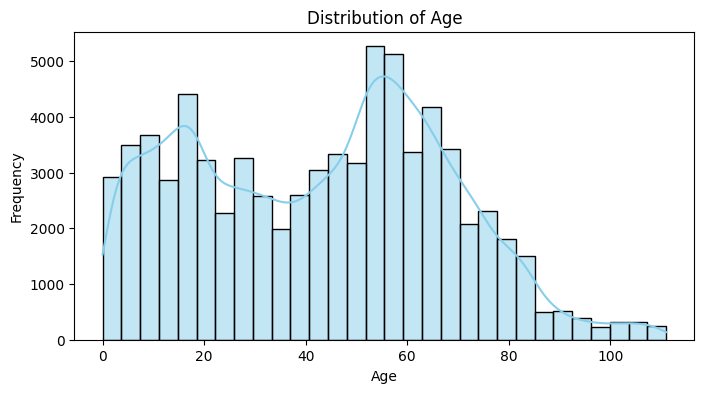

In [ ]:
# 1. Distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


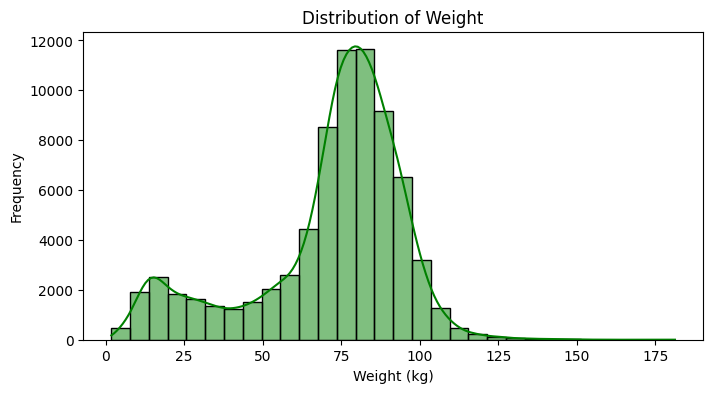

In [ ]:
# 2. Distribution of Weight
plt.figure(figsize=(8, 4))
sns.histplot(df['weight'], kde=True, bins=30, color='green')
plt.title('Distribution of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-84-536bf44b70a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_count.index, y=gender_count.values, palette='pastel')


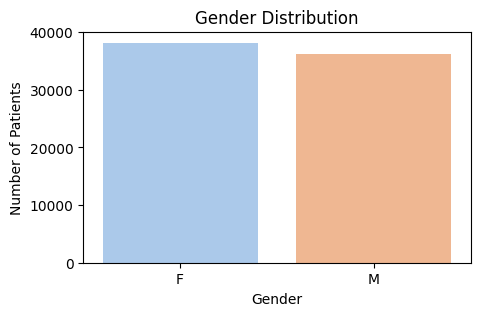

In [ ]:
# 3. Gender Distribution
plt.figure(figsize=(5, 3))
gender_count = df['gender'].value_counts()
sns.barplot(x=gender_count.index, y=gender_count.values, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()


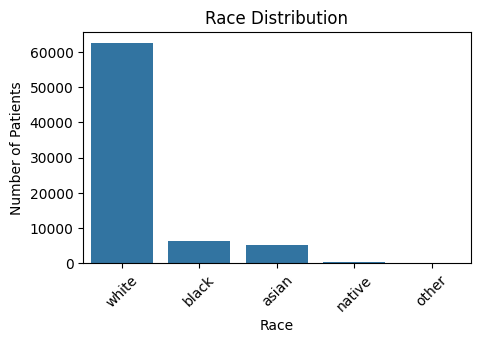

In [ ]:
# 4. Race Distribution
plt.figure(figsize=(5, 3))
race_count = df['race'].value_counts()
sns.barplot(x=race_count.index, y=race_count.values)
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()

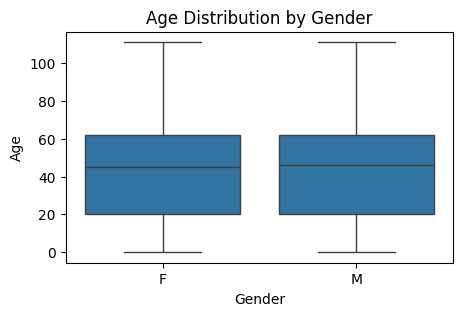

In [ ]:
# 5. Boxplot of Age by Gender
plt.figure(figsize=(5, 3))
sns.boxplot(x='gender', y='age', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


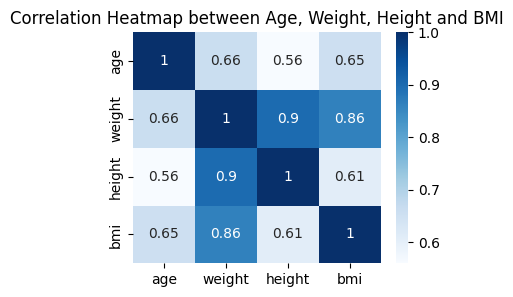

In [ ]:
# 8. Correlation heatmap between numerical features (age, weight)
plt.figure(figsize=(4, 3))
correlation_matrix = df[['age', 'weight','height','bmi']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap between Age, Weight, Height and BMI')
plt.show()